# Draw Impacts

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dftools

In [2]:
plt.style.use("cms")

In [3]:
!curl http://www.hep.ph.ic.ac.uk/~akd116/CP/202005_May/06_NewFitsPostFirstImpacts/impacts.json > impacts.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1652k  100 1652k    0     0  18.9M      0 --:--:-- --:--:-- --:--:-- 18.9M


In [4]:
with open("impacts.json") as f:
    impacts = json.load(f)
impacts.keys()

dict_keys(['POIs', 'method', 'params'])

## Convert
Convert json file into dataframe with columns:

- `param` - parameter name
- `param_value` - parameter best fit value
- `param_merrdown` - parameter -1 sigma value
- `param_merrup` - parameter +1 sigma value
- `poi_paramdown` - effect of parameter -1 sigma value on POI
- `poi_paramup` - effect of parameter +1 sigma value on POI

In [5]:
impacts["POIs"][0]

{'fit': [-23.536775588989258, 1.0765897684450465e-07, 23.738666534423828],
 'name': 'alpha'}

In [6]:
poi_name = impacts["POIs"][0]["name"]
display(poi_name)

poi_vals = impacts["POIs"][0]["fit"]
display(poi_vals)

'alpha'

[-23.536775588989258, 1.0765897684450465e-07, 23.738666534423828]

In [7]:
df = pd.DataFrame({
    "param": impact["name"],
    "param_value": impact["fit"][1],
    "param_merrdown": impact["fit"][0],
    "param_merrup": impact["fit"][2],
    "poi_paramdown": impact[poi_name][0] - impact[poi_name][1],
    "poi_paramup": impact[poi_name][2] - impact[poi_name][1],
    "type": impact["type"],
} for impact in impacts["params"]).set_index("param")
df

,param_value,param_merrdown,param_merrup,poi_paramdown,poi_paramup,type
param,,,,,,
BR_htt_PU_alphas,3.246971e-09,-0.706083,0.706081,-0.000477,0.000480,Gaussian
BR_htt_PU_mq,1.834358e-09,-0.706012,0.706019,-0.000809,0.000789,Gaussian
BR_htt_THU,2.238904e-09,-0.705957,0.706034,-0.000939,0.000789,Gaussian
CMS_IP_significance_Embed_2016_13TeV,0.000000e+00,-0.648628,0.636515,0.019355,-0.017038,Gaussian
CMS_IP_significance_Embed_2018_13TeV,3.874079e-08,-0.555296,0.553713,-0.023479,0.020731,Gaussian
...,...,...,...,...,...,...
lumi_2018_13TeV,-2.220897e-07,-0.698515,0.698575,-0.006871,0.006915,Gaussian
muV,1.000000e+00,0.750983,1.442849,-0.021651,0.024848,Unconstrained
muggH,1.000000e+00,0.879128,1.558639,0.007115,-0.037141,Unconstrained


In [8]:
# if want alpha in impacts
#data = [{
#    "param": poi_name,
#    "param_value": poi_vals[1],
#    "param_merrdown": poi_vals[0],
#    "param_merrup": poi_vals[2],
#    "poi_paramdown": poi_vals[0] - poi_vals[1],
#    "poi_paramup": poi_vals[2] - poi_vals[1],
#    "type": "Unconstrained",
#}]
#    
#for impact in impacts["params"]:
#    data.append({
#        "param": impact["name"],
#        "param_value": impact["fit"][1],
#        "param_merrdown": impact["fit"][0],
#        "param_merrup": impact["fit"][2],
#        "poi_paramdown": impact[poi_name][0] - impact[poi_name][1],
#        "poi_paramup": impact[poi_name][2] - impact[poi_name][1],
#        "type": impact["type"],
#    })
#        
#df = pd.DataFrame(data).set_index("param")
#df

## Unconstrained parameters
Don't plot the pull but give the parameter values

In [9]:
df["param_value_orig"] = df["param_value"]
df.loc[df["type"] == "Unconstrained", "param_value"] = np.nan
df

,param_value,param_merrdown,param_merrup,poi_paramdown,poi_paramup,type,param_value_orig
param,,,,,,,
BR_htt_PU_alphas,3.246971e-09,-0.706083,0.706081,-0.000477,0.000480,Gaussian,3.246971e-09
BR_htt_PU_mq,1.834358e-09,-0.706012,0.706019,-0.000809,0.000789,Gaussian,1.834358e-09
BR_htt_THU,2.238904e-09,-0.705957,0.706034,-0.000939,0.000789,Gaussian,2.238904e-09
CMS_IP_significance_Embed_2016_13TeV,0.000000e+00,-0.648628,0.636515,0.019355,-0.017038,Gaussian,0.000000e+00
CMS_IP_significance_Embed_2018_13TeV,3.874079e-08,-0.555296,0.553713,-0.023479,0.020731,Gaussian,3.874079e-08
...,...,...,...,...,...,...,...
lumi_2018_13TeV,-2.220897e-07,-0.698515,0.698575,-0.006871,0.006915,Gaussian,-2.220897e-07
muV,NaN,0.750983,1.442849,-0.021651,0.024848,Unconstrained,1.000000e+00
muggH,NaN,0.879128,1.558639,0.007115,-0.037141,Unconstrained,1.000000e+00


## Sort
Sort by the maximum of the absolute value of the up and down impacts

In [10]:
df["envelope"] = df[["poi_paramdown","poi_paramup"]].abs().max(axis=1)
df = df.sort_values("envelope", ascending=False)
df

,param_value,param_merrdown,param_merrup,poi_paramdown,poi_paramup,type,param_value_orig,envelope
param,,,,,,,,
CMS_htt_tt_2018_tt_2018_higgs_Pi_Pi_13TeV_Wfakes_bbb_bin_5,1.333569e-07,-0.604223,0.744186,0.103350,-0.070243,Gaussian,1.333569e-07,0.103350
CMS_res_j_13TeV_2018,2.049125e-10,-0.776073,0.785441,0.046637,0.092613,Gaussian,2.049125e-10,0.092613
CMS_scale_j_HF_13TeV,2.311040e-12,-0.784410,0.685385,0.092563,0.002372,Gaussian,2.311040e-12,0.092563
CMS_scale_j_FlavorQCD_13TeV,1.578481e-07,-0.621098,0.775996,0.088558,0.021141,Gaussian,1.578481e-07,0.088558
CMS_scale_j_RelativeBal_13TeV,8.881784e-15,-0.687697,0.762980,0.088368,0.040200,Gaussian,8.881784e-15,0.088368
...,...,...,...,...,...,...,...,...
CMS_htt_tt_2017_tt_2017_higgs_A1_0A1_13TeV_qqH_bin_2,0.000000e+00,-0.824122,0.824122,0.000000,0.000000,Gaussian,0.000000e+00,0.000000
CMS_htt_tt_2016_tt_2016_jetFakes_13TeV_qqH_bin_3,3.874411e-09,-0.824122,0.824122,0.000000,0.000000,Gaussian,3.874411e-09,0.000000
CMS_htt_tt_2017_tt_2017_jetFakes_13TeV_qqH_bin_7,4.729106e-11,-0.824122,0.824122,0.000000,0.000000,Gaussian,4.729106e-11,0.000000


## Plotting impacts 

In [109]:
initial = 0
params_ppg = 20
count = initial + params_ppg
tick_range = [int(x) for x in np.linspace(count, initial+1, num=params_ppg)]

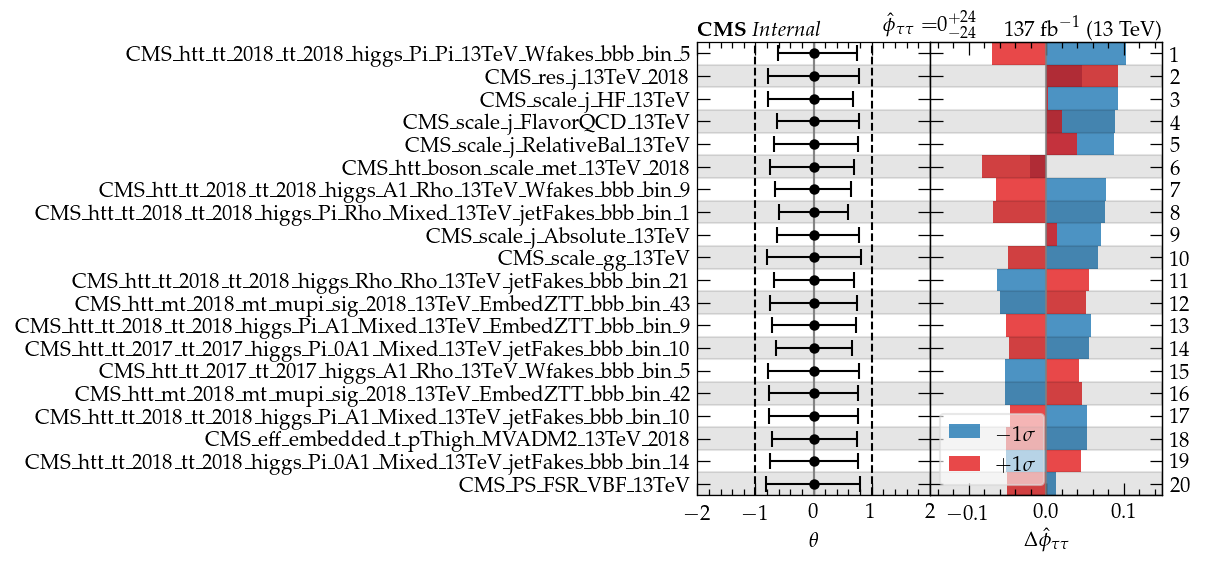

In [113]:
fig, ax = dftools.draw.impacts(df.iloc[initial:count][::-1])

result = f"${poi_vals[1]:.0f}_{{{poi_vals[0]:.0f}}}^{{+{poi_vals[2]:.0f}}}$"
extra_label=r'$\hat{\phi}_{\tau\tau} = $'+result
lumi = 137
energy = 13
label = "Internal"
ax[0].text(
    0, 1, r'$\mathbf{CMS}\ \mathit{'+label+'}$',
    ha='left', va='bottom', transform=ax[0].transAxes,
)
ax[1].text(
    1, 1, r'${:.0f}\ \mathrm{{fb}}^{{-1}}$ ({:.0f} TeV)'.format(lumi, energy),
    ha='right', va='bottom', transform=ax[1].transAxes,
)
# label on centre top of axes
ax[1].text(
    0, 1, extra_label,
    ha='center', va='bottom', transform=ax[1].transAxes,
)

ax[0].set_xlim(-2, 2)
ax[0].set_xticks([-2, -1, 0, 1, 2])
ax[0].axvline(-1, color='k', ls='--')
ax[0].axvline(1, color='k', ls='--')

ax[1].set_xlim(-0.15, 0.15)
ax[1].set_xticks([-0.1, 0., 0.1])
ax[1].legend_._loc = 3
ax[1].set_xlabel(r'$\Delta\hat{\phi}_{\tau\tau}$')

# shitly hardcoded right now
# muggH annotate 43rd 
if 43 in tick_range:
    ax[0].text(
        -0.6, count-43, r'$1.00^{+0.56}_{-0.12}$',
        zorder=10,
    )
# muV annotate 116th
if 116 in tick_range:
    ax[0].text(
        -0.6, count-116, r'$1.00^{+0.44}_{-0.25}$',
        zorder=10,
       
    )
# turn on minor ticks everywhere and turn off for y-axis
ax[0].minorticks_on()
ax[0].yaxis.set_tick_params(which='minor', bottom=False, right=False)

axtwin = ax[1].twinx()
axtwin.set_ylim(params_ppg+0.5, 0.5)
axtwin.set_yticks(params_ppg-np.arange(params_ppg))
axtwin.set_yticklabels(tick_range)
axtwin.minorticks_off()

# similar for other axis
ax[1].minorticks_on()
ax[1].yaxis.set_tick_params(which='minor', left=False)

for idx in range(0, 20, 2):
    ax[0].axhspan(idx, idx+1, color='k', alpha=0.1)
    ax[1].axhspan(idx, idx+1, color='k', alpha=0.1)